In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
import numpy as np
from datetime import date

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
today = date.today()

In [3]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'

In [4]:
urlretrieve(url,'covid_19_geo_dist.xlsx')

('covid_19_geo_dist.xlsx', <http.client.HTTPMessage at 0x1a18ed8588>)

In [5]:
df = pd.read_excel('covid_19_geo_dist.xlsx',parse_dates=['dateRep'])
df.dropna(axis=0,inplace=True)

In [6]:
cases_1000 = df[df['cases'] >= 1000].reset_index()
cases_1000.sample(5)

,index,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
224,8813,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,USA,327167434.0
23,1504,2020-03-26,26,3,2020,1426,8,Canada,CA,CAN,37058856.0
101,4020,2020-03-25,25,3,2020,1762,122,Iran,IR,IRN,81800269.0
120,4414,2020-04-02,2,4,2020,4782,727,Italy,IT,ITA,60431283.0
95,4014,2020-03-31,31,3,2020,3186,117,Iran,IR,IRN,81800269.0


### Countries with cases greater than 1000

In [7]:
countries_1000 = cases_1000.groupby(cases_1000['countriesAndTerritories'])['deaths','cases'].sum()
y = countries_1000.index
x = countries_1000.cases

Text(0.5, 1.0, 'Countries with the most cases')

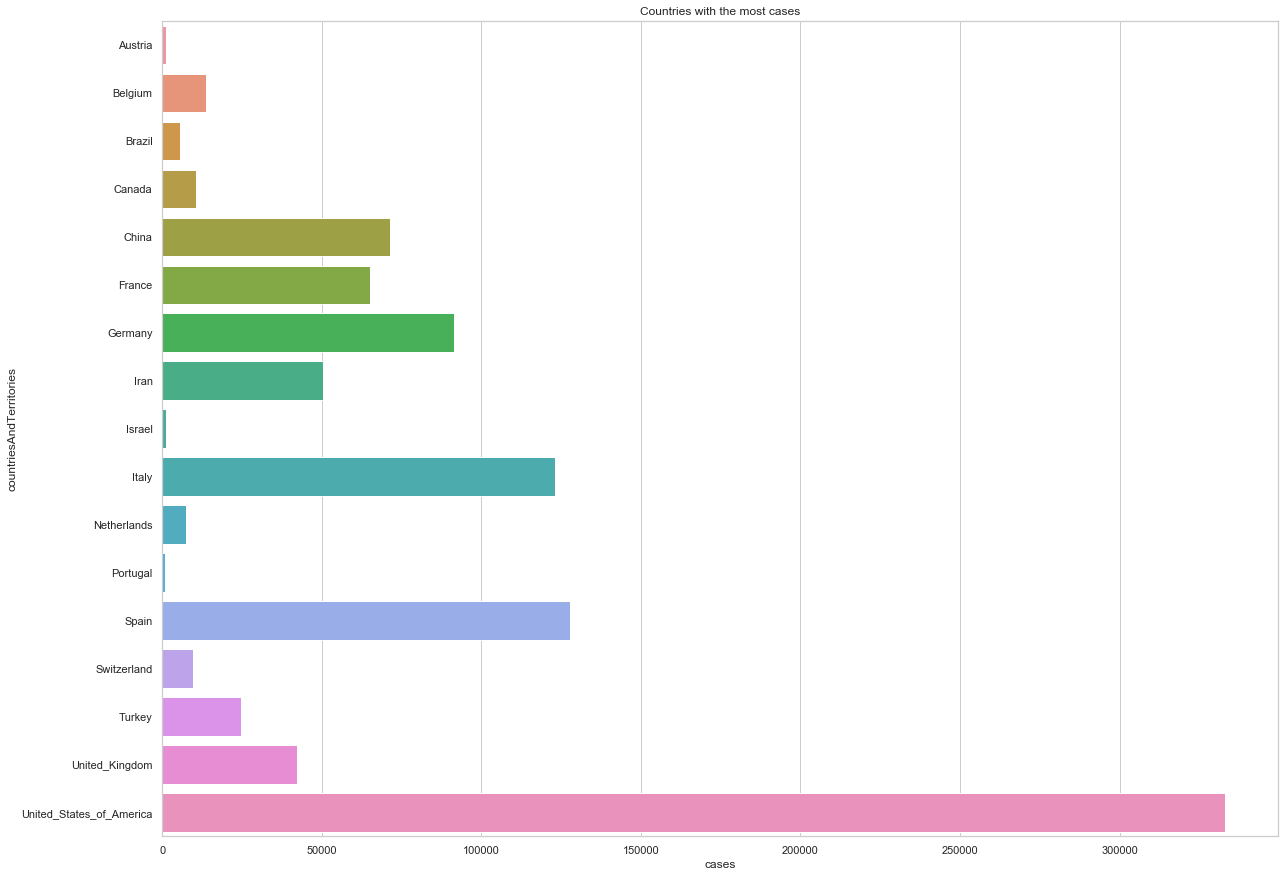

In [8]:
plt.figure(figsize = (20,15))
sns.barplot(x=countries_1000.cases,y=countries_1000.index)
plt.title('Countries with the most cases')

Text(0.5, 1.0, 'Countries with the most deaths')

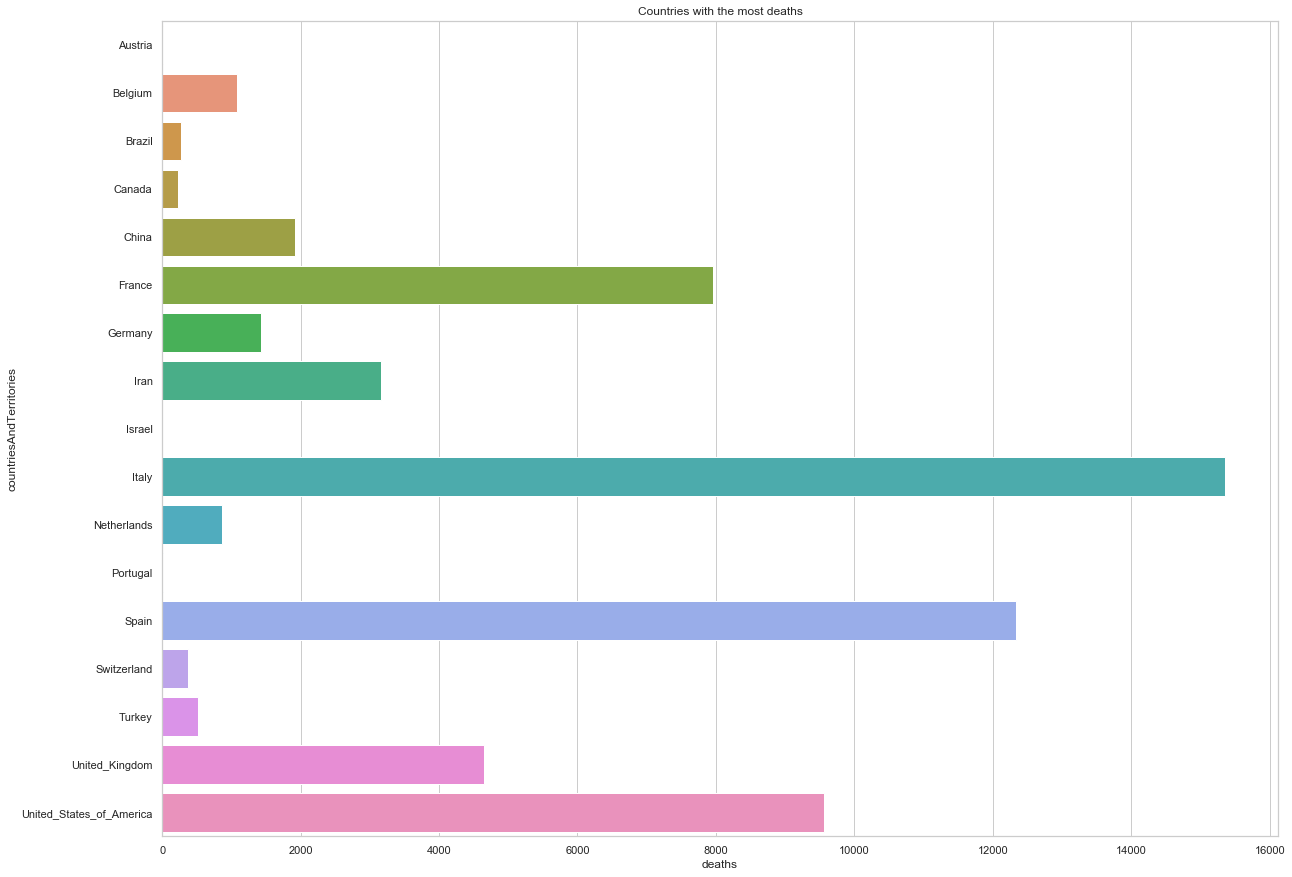

In [9]:
plt.figure(figsize = (20,15))
sns.barplot(x=countries_1000.deaths,y=countries_1000.index)
plt.title('Countries with the most deaths')

# Rate of infection = K × (the number of infections)/(the number of population)

In [10]:
# World Population as of 2019
pop = 7.75 * 1000000000

In [11]:
df2 = df.groupby(df.dateRep)['cases','deaths'].sum()


In [12]:
df2['pop'] = pop - df2.deaths.shift()
df2['total_cases'] = df2['cases'].cumsum()
df2['total_deaths'] = df2['deaths'].cumsum()
df2.dropna(inplace=True)

In [13]:
df2['pop'] = df2['pop'].apply(lambda x : ((x+2.5)-1))

In [14]:
df2['infection_rate_%'] = ((df2['total_cases']/df2['pop'])*100)
df2['mortality_rate_%'] = ((df2['total_deaths']/df2['pop'])*100)

In [15]:
def normalise_col(data):
    if data < 0.01:
        return data * 1000
    elif data < 0.1:
        return data * 100
    else:
        return data * 10

In [16]:
df2['infection_rate_%'] = df2['infection_rate_%'].apply(normalise_col)
df2['mortality_rate_%'] = df2['mortality_rate_%'].apply(normalise_col)

In [17]:
df2.tail(30)

,cases,deaths,pop,total_cases,total_deaths,infection_rate_%,mortality_rate_%
dateRep,,,,,,,
2020-03-08,3691,97,7.750000e+09,105119,3579,1.356374,0.046181
2020-03-09,3871,229,7.750000e+09,108990,3808,1.406323,0.049135
2020-03-10,4546,208,7.750000e+09,113536,4016,1.464981,0.051819
2020-03-11,4378,269,7.750000e+09,117914,4285,1.521471,0.055290
2020-03-12,6887,326,7.750000e+09,124801,4611,1.610336,0.059497
2020-03-13,8355,351,7.750000e+09,133156,4962,1.718142,0.064026
2020-03-14,9375,438,7.750000e+09,142531,5400,1.839110,0.069677
2020-03-15,8138,354,7.750000e+09,150669,5754,1.944116,0.074245
2020-03-16,16051,745,7.750000e+09,166720,6499,2.151226,0.083858


/Users/prince/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


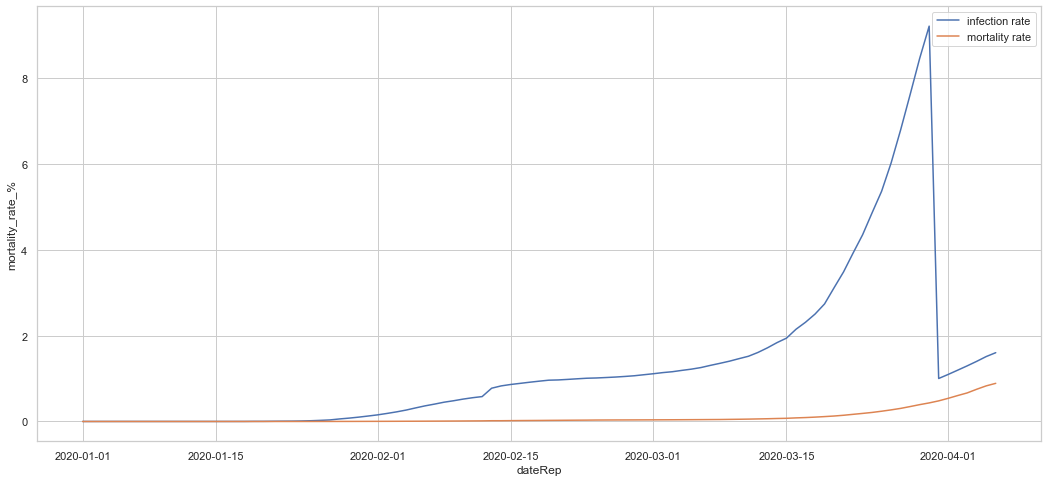

In [18]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['infection_rate_%'])
sns.lineplot(x = df2.index, y = df2['mortality_rate_%'])
plt.legend(['infection rate','mortality rate'])

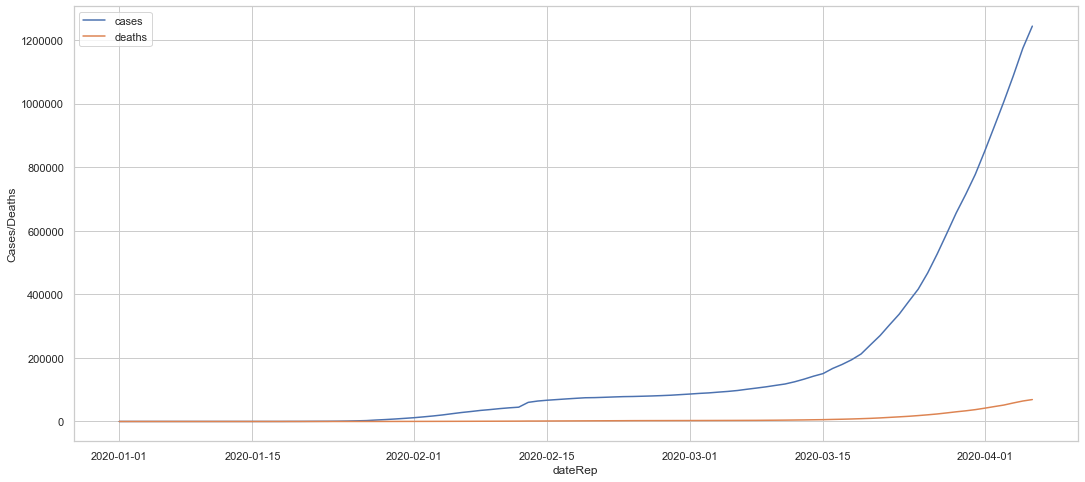

In [19]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['total_cases'])
sns.lineplot(x = df2.index, y = df2['total_deaths'])
plt.ylabel('Cases/Deaths')
plt.legend(['cases','deaths'])

Text(0.5, 1.0, 'Drop in population (approx)')

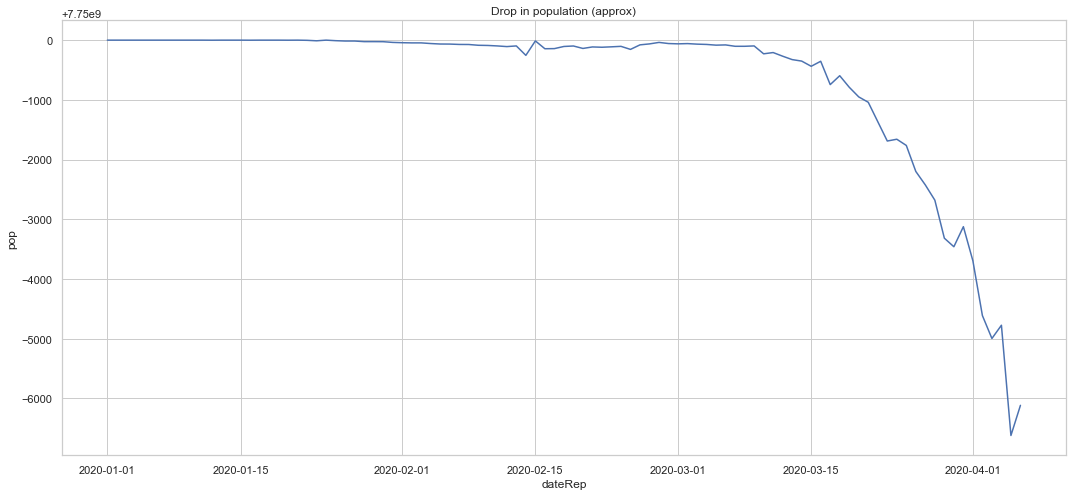

In [20]:
plt.figure(figsize=(18,8))
sns.lineplot(x = df2.index, y = df2['pop'])
plt.title('Drop in population (approx)')

In [21]:
print(url[-14:-5])
print(today)
print('There are {0} cases and {1} deaths as of today \nThere are {2} new cases today and {3} deaths were recorded today as well \nGod Save us all'
      .format(df2.total_cases[-1], df2.total_deaths[-1], df2.cases[-1], df2.deaths[-1]))

worldwide
2020-04-06
There are 1243667 cases and 68969 deaths as of today 
There are 69766 new cases today and 4576 deaths were recorded today as well 
God Save us all


In [22]:
df.tail(20)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9087,2020-03-21,21,3,2020,0,0,Zambia,ZM,ZMB,17351822.0
9088,2020-03-20,20,3,2020,0,0,Zambia,ZM,ZMB,17351822.0
9089,2020-03-19,19,3,2020,2,0,Zambia,ZM,ZMB,17351822.0
9090,2020-04-06,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9091,2020-04-05,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9092,2020-04-04,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9093,2020-04-03,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9094,2020-04-02,2,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9095,2020-04-01,1,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9096,2020-03-31,31,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0


In [23]:
italy = df[df.countriesAndTerritories == 'Nigeria']
italy = italy.groupby(italy.dateRep)['cases','deaths'].sum()
italy['total_cases'] = italy.cases.cumsum()
italy['total_deaths'] = italy.deaths.cumsum()
italy.tail()

,cases,deaths,total_cases,total_deaths
dateRep,,,,
2020-04-02,20,0,151,2
2020-04-03,23,0,174,2
2020-04-04,16,0,190,2
2020-04-05,20,2,210,4
2020-04-06,22,1,232,5


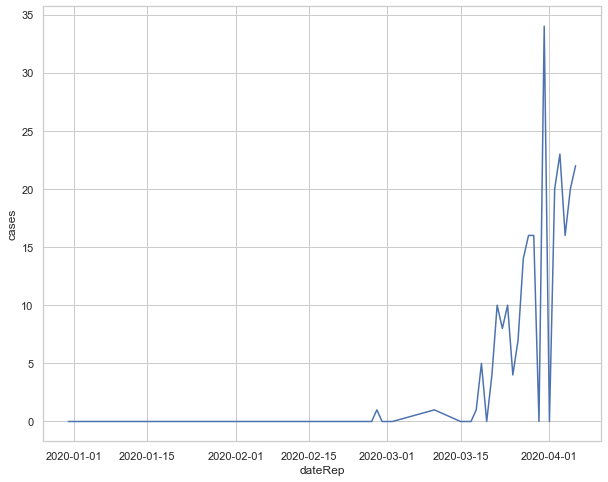

In [24]:
plt.figure(figsize=(10,8))
sns.lineplot(x = italy.index, y = italy.cases )